In [1056]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [1057]:
train = pd.read_csv('train_qnU1GcL.csv')

In [1058]:
test = pd.read_csv('test_0oGmkor.csv')

In [1059]:
x_train = train.drop(['id','target'],axis = 1)

In [1060]:
y_train = train['target']

In [1061]:
train.head()

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,target
0,110936,0.429,12058,355060,0.0,0.0,0.0,99.02,13,C,Urban,1
1,41492,0.010,21546,315150,0.0,0.0,0.0,99.89,21,A,Urban,1
2,31300,0.917,17531,84140,2.0,3.0,1.0,98.69,7,C,Rural,0
3,19415,0.049,15341,250510,0.0,0.0,0.0,99.57,9,A,Urban,1
4,99379,0.052,31400,198680,0.0,0.0,0.0,99.87,12,B,Urban,1


# Univariate Analysis

In [1062]:
train.describe()

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,target
count,79853.000000,79853.000000,79853.000000,7.985300e+04,79756.000000,79756.000000,79756.000000,76879.000000,79853.000000,79853.000000
mean,57167.166368,0.314288,18846.696906,2.088472e+05,0.248671,0.078188,0.060008,99.067291,10.863887,0.937410
std,32928.970160,0.334915,5208.719136,4.965826e+05,0.691468,0.436507,0.312023,0.739799,5.170687,0.242226
min,2.000000,0.000000,7670.000000,2.403000e+04,0.000000,0.000000,0.000000,91.900000,2.000000,0.000000
25%,28640.000000,0.034000,14974.000000,1.080100e+05,0.000000,0.000000,0.000000,98.810000,7.000000,1.000000
50%,57262.000000,0.167000,18625.000000,1.665600e+05,0.000000,0.000000,0.000000,99.210000,10.000000,1.000000
75%,85632.000000,0.538000,22636.000000,2.520900e+05,0.000000,0.000000,0.000000,99.540000,14.000000,1.000000
max,114076.000000,1.000000,37602.000000,9.026260e+07,13.000000,17.000000,11.000000,99.890000,60.000000,1.000000


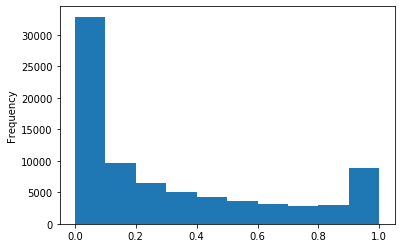

In [1063]:
train['perc_premium_paid_by_cash_credit'].plot.hist()


We can see that this is right skewed hence we use sqrt transformation

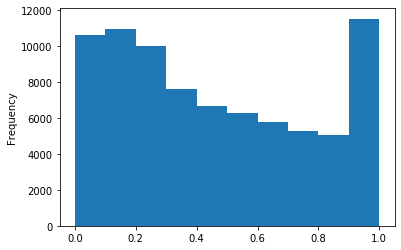

In [1064]:
np.sqrt(train['perc_premium_paid_by_cash_credit']).plot.hist()

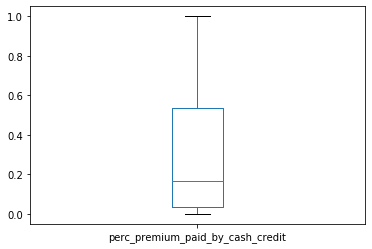

In [1065]:
train['perc_premium_paid_by_cash_credit'].plot.box()

In [1066]:
train['perc_premium_paid_by_cash_credit'].corr(train['target'])

-0.24098021041593817

In [1067]:
#x_train = pd.get_dummies(x_train)
from sklearn import preprocessing
lenc = preprocessing.LabelEncoder()
x_train['sourcing_channel']=lenc.fit_transform(x_train['sourcing_channel'])
x_train['residence_area_type']= lenc.fit_transform(x_train['residence_area_type'])
x_train.head()

,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type
0,0.429,12058,355060,0.0,0.0,0.0,99.02,13,2,1
1,0.010,21546,315150,0.0,0.0,0.0,99.89,21,0,1
2,0.917,17531,84140,2.0,3.0,1.0,98.69,7,2,0
3,0.049,15341,250510,0.0,0.0,0.0,99.57,9,0,1
4,0.052,31400,198680,0.0,0.0,0.0,99.87,12,1,1


In [1068]:
#x_train = x_train.drop('residence_area_type_Rural',axis = 1)
x_train.shape

(79853, 10)

In [1069]:
x_train.dtypes

perc_premium_paid_by_cash_credit    float64
age_in_days                           int64
Income                                int64
Count_3-6_months_late               float64
Count_6-12_months_late              float64
Count_more_than_12_months_late      float64
application_underwriting_score      float64
no_of_premiums_paid                   int64
sourcing_channel                      int32
residence_area_type                   int32
dtype: object

In [1070]:
x_train['target'] = y_train

In [1071]:
x_train.shape

(79853, 11)

In [1072]:
x_train.corr()

,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,target
perc_premium_paid_by_cash_credit,1.000000,-0.259131,-0.031868,0.214470,0.214951,0.168125,-0.142670,-0.152837,0.081999,-0.001562,-0.240980
age_in_days,-0.259131,1.000000,0.029308,-0.058366,-0.072731,-0.059407,0.049888,0.176544,-0.217896,0.000684,0.095103
Income,-0.031868,0.029308,1.000000,-0.001403,-0.017347,-0.012399,0.085746,0.079078,0.059770,0.003392,0.016541
Count_3-6_months_late,0.214470,-0.058366,-0.001403,1.000000,0.204228,0.296085,-0.082781,0.075828,0.058662,0.001592,-0.248900
Count_6-12_months_late,0.214951,-0.072731,-0.017347,0.204228,1.000000,0.266306,0.004785,-0.093133,0.027627,-0.000770,-0.286159
Count_more_than_12_months_late,0.168125,-0.059407,-0.012399,0.296085,0.266306,1.000000,-0.031726,-0.021848,0.029198,-0.001178,-0.240385
application_underwriting_score,-0.142670,0.049888,0.085746,-0.082781,0.004785,-0.031726,1.000000,-0.270864,-0.048353,0.005009,0.068715
no_of_premiums_paid,-0.152837,0.176544,0.079078,0.075828,-0.093133,-0.021848,-0.270864,1.000000,0.040874,0.003447,0.022664
sourcing_channel,0.081999,-0.217896,0.059770,0.058662,0.027627,0.029198,-0.048353,0.040874,1.000000,-0.002067,-0.041557
residence_area_type,-0.001562,0.000684,0.003392,0.001592,-0.000770,-0.001178,0.005009,0.003447,-0.002067,1.000000,0.001667


In [1073]:
train['target'].value_counts()/len(train['target'])

1    0.93741
0    0.06259
Name: target, dtype: float64

In [1074]:
train.groupby('target')['perc_premium_paid_by_cash_credit'].mean()

target
0    0.626626
1    0.293433
Name: perc_premium_paid_by_cash_credit, dtype: float64

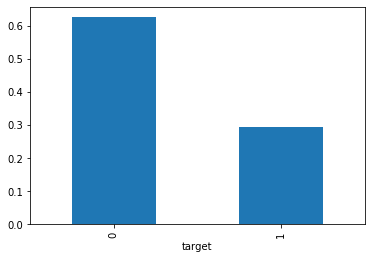

In [1075]:
train.groupby('target')['perc_premium_paid_by_cash_credit'].mean().plot.bar()

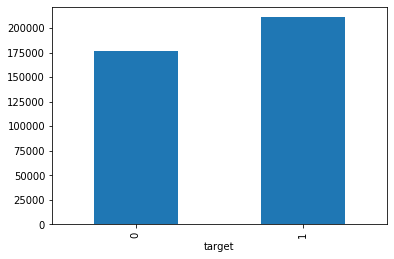

In [1076]:
train.groupby('target')['Income'].mean().plot.bar()

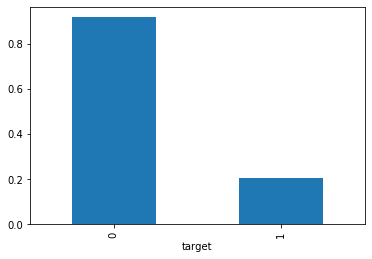

In [1077]:
train.groupby('target')['Count_3-6_months_late'].mean().plot.bar()

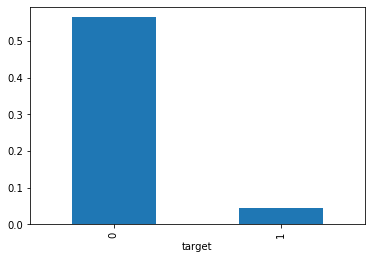

In [1078]:
train.groupby('target')['Count_6-12_months_late'].mean().plot.bar()

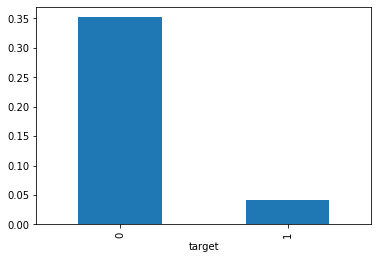

In [1079]:
train.groupby('target')['Count_more_than_12_months_late'].mean().plot.bar()

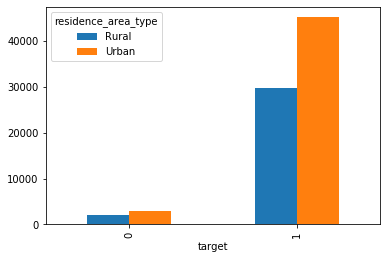

In [1080]:
pd.crosstab(train['target'],train['residence_area_type']).plot.bar()

In [1081]:
#from scipy.stats import chi2_contingency as contingency

In [1082]:
#contingency(pd.crosstab(train['target'],train['Income']))

In [1083]:
pd.crosstab(train['target'],train['residence_area_type'])

residence_area_type,Rural,Urban
target,,
0,1998,3000
1,29672,45183


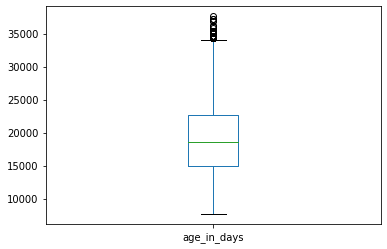

In [1084]:
train['age_in_days'].plot.box()

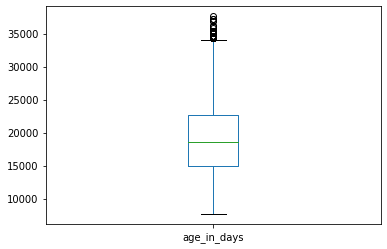

In [1085]:
x_train['age_in_days'].plot.box()

In [1086]:
x_train = x_train[x_train['age_in_days']<34000]

(79809, 11)

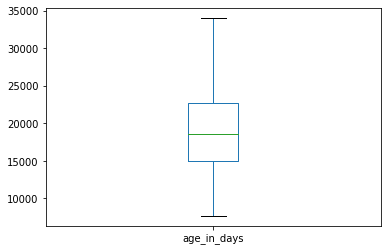

In [1087]:
x_train['age_in_days'].plot.box()
x_train.shape

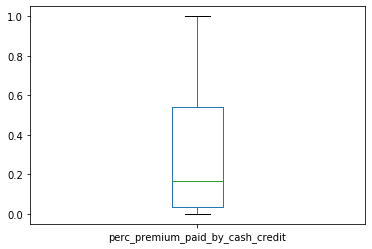

In [1088]:
x_train['perc_premium_paid_by_cash_credit'].plot.box()

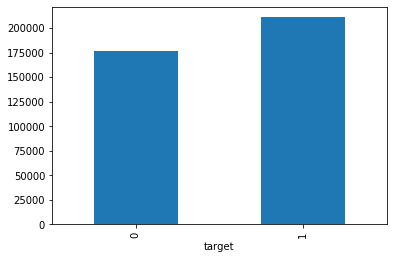

In [1089]:
x_train.groupby('target')['Income'].mean().plot.bar()

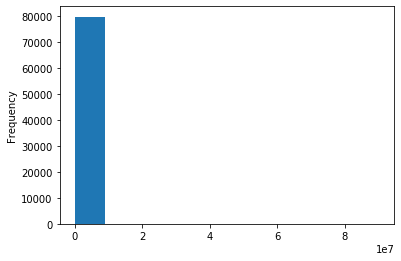

In [1090]:
x_train['Income'].plot.hist()

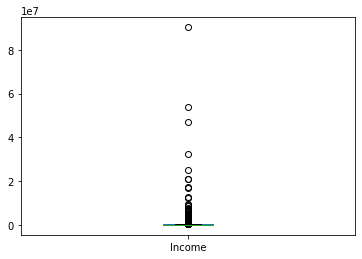

In [1091]:
x_train['Income'].plot.box()

In [1092]:
q3 = x_train['Income'].quantile(0.75)

In [1093]:
q1 = x_train['Income'].quantile(0.25)

In [1094]:
Iqr = q3-q1

In [1095]:
q3+1.5*Iqr

468180.0

In [1096]:
x_train[x_train['Income']>468180].count()

perc_premium_paid_by_cash_credit    3428
age_in_days                         3428
Income                              3428
Count_3-6_months_late               3427
Count_6-12_months_late              3427
Count_more_than_12_months_late      3427
application_underwriting_score      3341
no_of_premiums_paid                 3428
sourcing_channel                    3428
residence_area_type                 3428
target                              3428
dtype: int64

In [1097]:
x_train = x_train[x_train['Income']<468180]

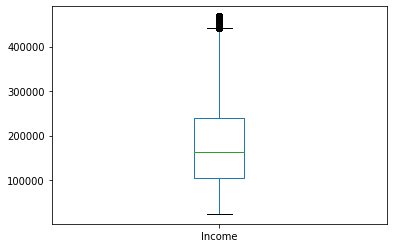

In [1098]:
x_train['Income'].plot.box()

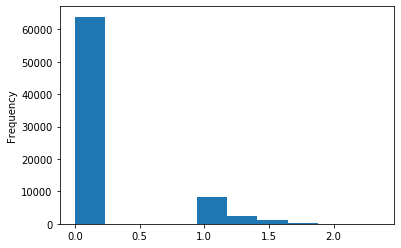

In [1099]:
np.power(x_train['Count_3-6_months_late'],1/3).plot.hist()

In [1100]:
x_train.isnull().sum()

perc_premium_paid_by_cash_credit       0
age_in_days                            0
Income                                 0
Count_3-6_months_late                 96
Count_6-12_months_late                96
Count_more_than_12_months_late        96
application_underwriting_score      2869
no_of_premiums_paid                    0
sourcing_channel                       0
residence_area_type                    0
target                                 0
dtype: int64

In [1101]:
x_train['Count_3-6_months_late'].value_counts()

0.0     63906
1.0      8423
2.0      2412
3.0       917
4.0       360
5.0       158
6.0        66
7.0        22
8.0        13
9.0         4
11.0        1
12.0        1
13.0        1
10.0        1
Name: Count_3-6_months_late, dtype: int64

In [1102]:
pd.crosstab(x_train['target'],x_train['Count_3-6_months_late'])

Count_3-6_months_late,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
target,,,,,,,,,,,,,,
0,2528,1122,573,280,155,64,30,9,5,2,1,1,1,1
1,61378,7301,1839,637,205,94,36,13,8,2,0,0,0,0


In [1103]:
x_train['application_underwriting_score'].fillna(x_train['application_underwriting_score'].mean(),inplace = True)

In [1104]:
x_train['Count_3-6_months_late'].fillna(0,inplace = True)

In [1105]:
x_train['Count_6-12_months_late'].fillna(0,inplace = True)

In [1106]:
x_train['Count_more_than_12_months_late'].fillna(0,inplace = True)

In [1107]:
x_train.isnull().sum()

perc_premium_paid_by_cash_credit    0
age_in_days                         0
Income                              0
Count_3-6_months_late               0
Count_6-12_months_late              0
Count_more_than_12_months_late      0
application_underwriting_score      0
no_of_premiums_paid                 0
sourcing_channel                    0
residence_area_type                 0
target                              0
dtype: int64

In [1108]:
#pd.crosstab(x_train['sourcing_channel_A'],x_train['target'])

In [1109]:
#pd.crosstab(x_train['sourcing_channel_B'],x_train['target'])

In [1110]:
#pd.crosstab(x_train['sourcing_channel_C'],x_train['target'])

In [1111]:
#pd.crosstab(x_train['sourcing_channel_D'],x_train['target'])

In [1112]:
#pd.crosstab(x_train['sourcing_channel_E'],x_train['target'])

In [1113]:
from sklearn.linear_model import LinearRegression

In [1114]:
dtreg = LinearRegression(normalize = True)

In [1115]:
test.isnull().sum()

id                                     0
perc_premium_paid_by_cash_credit       0
age_in_days                            0
Income                                 0
Count_3-6_months_late                 31
Count_6-12_months_late                31
Count_more_than_12_months_late        31
application_underwriting_score      1323
no_of_premiums_paid                    0
sourcing_channel                       0
residence_area_type                    0
dtype: int64

In [1116]:
#test = pd.get_dummies(test)
test['sourcing_channel']=lenc.fit_transform(test['sourcing_channel'])
test['residence_area_type']= lenc.fit_transform(test['residence_area_type'])
test.head()

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type
0,649,0.001,27384,51150,0.0,0.0,0.0,99.89,7,0,0
1,81136,0.124,23735,285140,0.0,0.0,0.0,98.93,19,0,1
2,70762,1.000,17170,186030,0.0,0.0,0.0,NaN,2,1,1
3,53935,0.198,16068,123540,0.0,0.0,0.0,99.00,11,1,0
4,15476,0.041,10591,200020,1.0,0.0,0.0,99.17,14,0,0


In [1117]:
test.isnull().sum()

id                                     0
perc_premium_paid_by_cash_credit       0
age_in_days                            0
Income                                 0
Count_3-6_months_late                 31
Count_6-12_months_late                31
Count_more_than_12_months_late        31
application_underwriting_score      1323
no_of_premiums_paid                    0
sourcing_channel                       0
residence_area_type                    0
dtype: int64

In [1118]:
test['Count_3-6_months_late'].fillna(0,inplace= True)

In [1119]:
test['Count_6-12_months_late'].fillna(0,inplace= True)

In [1120]:
test['Count_more_than_12_months_late'].fillna(0,inplace= True)

In [1121]:
test['application_underwriting_score'].fillna(test['application_underwriting_score'].mean(),inplace= True)

In [1122]:
test.isnull().sum()

id                                  0
perc_premium_paid_by_cash_credit    0
age_in_days                         0
Income                              0
Count_3-6_months_late               0
Count_6-12_months_late              0
Count_more_than_12_months_late      0
application_underwriting_score      0
no_of_premiums_paid                 0
sourcing_channel                    0
residence_area_type                 0
dtype: int64

In [1123]:
y_train = train[train['Income']<468180]['target']

In [1124]:
y_train.shape

(76425,)

In [1125]:
y_train = x_train['target']

In [1126]:
x_train = x_train.drop('target',axis = 1)

In [1127]:
x_train.shape

(76381, 10)

In [1128]:
x_train.shape, y_train.shape

((76381, 10), (76381,))

In [1129]:
dtreg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [1130]:
test = test.drop('id',axis = 1)

In [1131]:
#test = test.drop('residence_area_type_Rural',axis = 1)

In [1132]:
test.shape

(34224, 10)

In [1133]:
pred = dtreg.predict(test)

In [1134]:
submission_2nd = pd.DataFrame()

In [1135]:
submission_2nd['target'] = pred

In [1136]:
submission_2nd.to_csv('submission_2nd',header = True, index = False)

In [1137]:
submission_2nd.describe()

,target
count,34224.000000
mean,0.939450
std,0.099902
min,-0.408172
25%,0.914735
50%,0.968435
75%,0.993239
max,2.685092


In [1138]:
a = []

In [1139]:
for i in submission_2nd['target']:
    if i<0.925:
        a.append(0)
    else:
        a.append(1)

In [1140]:
a = pd.array(a)

In [1141]:
pred2 = pd.DataFrame()

In [1142]:
pred2['target']=a

In [1143]:
pred2.to_csv('pred2',header=True,index=False)

In [1144]:
pred2.dtypes


target    int32
dtype: object

In [1145]:
pred2[pred2['target']==0].count()


target    9759
dtype: int64

In [1146]:
pred2[pred2['target']==1].count()

target    24465
dtype: int64